In [1]:
import datetime

import pandas as pd
from matplotlib import pyplot as plt

from periodic_patterns_v2 import TimeStampSetV2
from periodicity import get_topk_periods

In [2]:
df = pd.read_csv('proxy_login.log.csv')
df

,timestamp,connectivity,login_redirect,duration,successfully_logged_in
0,2020-06-16 17:43:44.697989,1,0,0.413221,1
1,2020-06-16 17:44:45.111549,1,0,0.404907,1
2,2020-06-16 17:45:45.516516,1,0,0.397478,1
3,2020-06-16 17:46:45.915872,1,0,0.400688,1
4,2020-06-16 17:47:46.317341,1,0,0.391693,1
...,...,...,...,...,...
199682,2020-09-14 10:47:23.699560,1,0,0.411656,1
199683,2020-09-14 10:47:54.111404,1,0,0.402895,1
199684,2020-09-14 10:48:24.515735,1,0,25.525615,1
199685,2020-09-14 10:49:20.041369,0,0,45.020597,0


In [3]:
timestamps = pd.to_datetime(df[df['connectivity'] == 0]['timestamp'])
timestamps

362      2020-06-16 23:47:05.602680
363      2020-06-16 23:48:35.622369
364      2020-06-16 23:50:05.643701
365      2020-06-16 23:51:35.654338
366      2020-06-16 23:53:05.674135
                    ...            
198751   2020-09-14 02:51:47.241110
199510   2020-09-14 09:15:37.574806
199511   2020-09-14 09:16:49.610157
199664   2020-09-14 10:36:40.302343
199685   2020-09-14 10:49:20.041369
Name: timestamp, Length: 1142, dtype: datetime64[ns]

# events

In [4]:
tss = TimeStampSetV2(timestamps)
len(tss)

1142

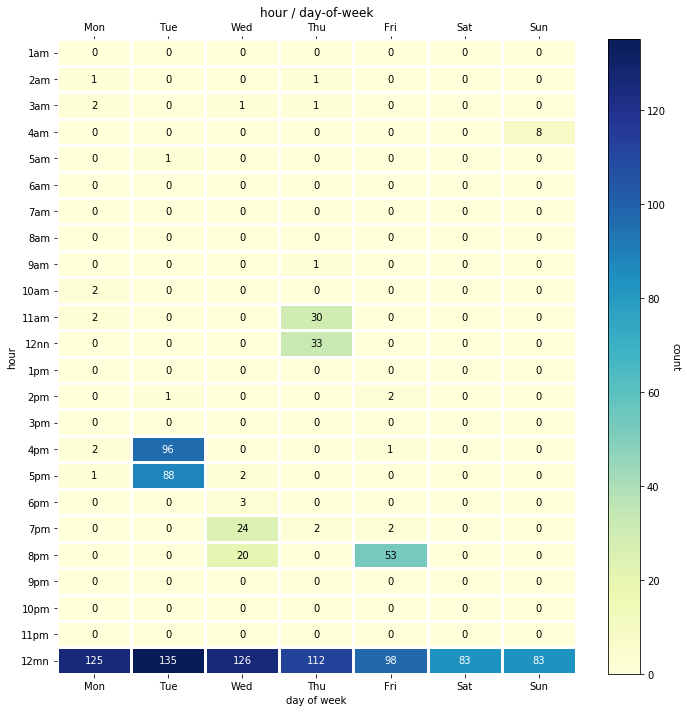

In [5]:
tss.hour_of_day.plot()

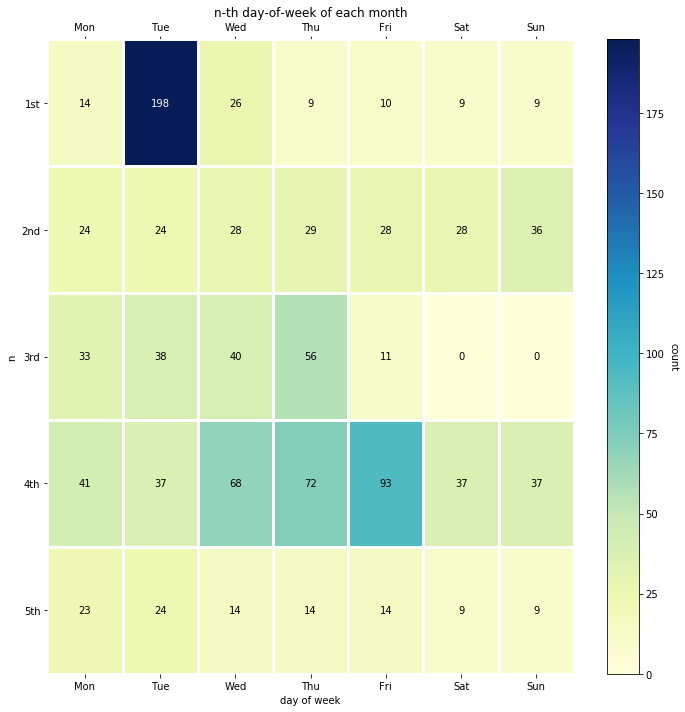

In [6]:
tss.nth_day_of_month.plot()

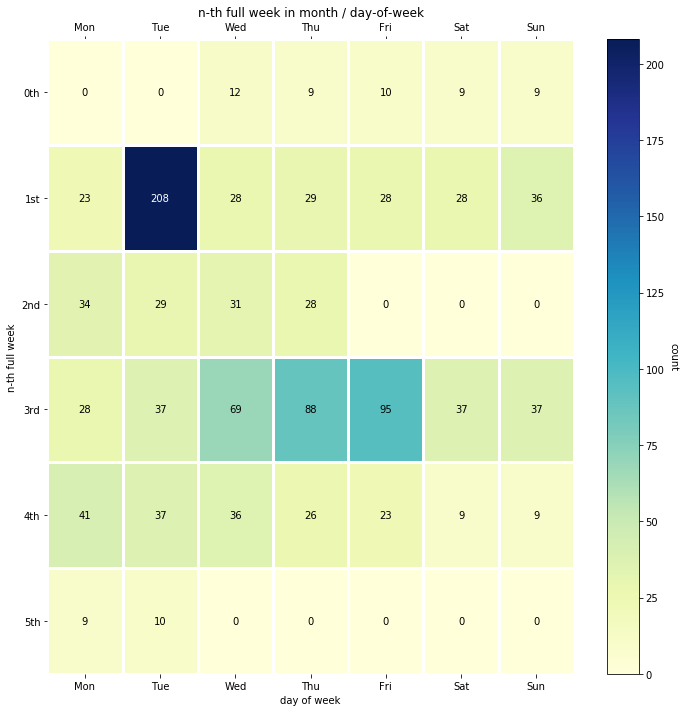

In [7]:
tss.full_week_of_month.plot()

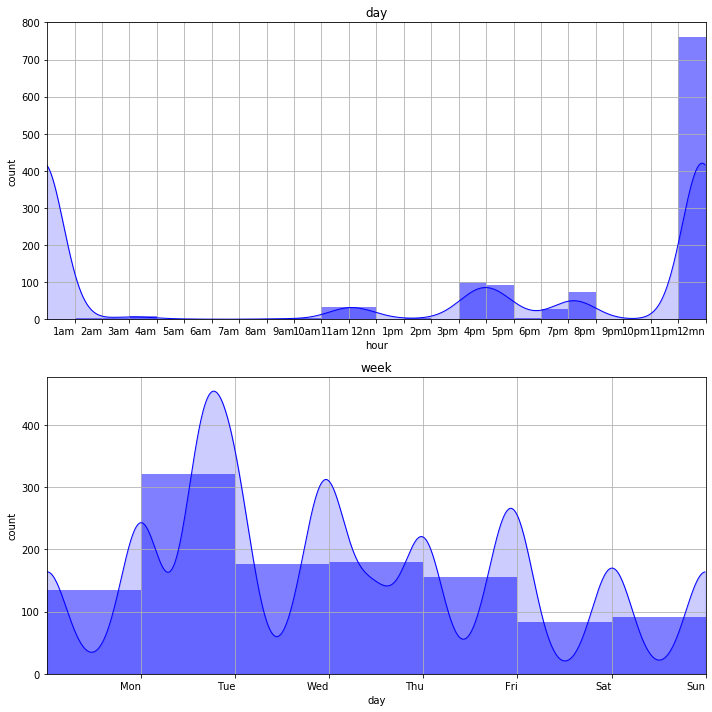

In [8]:
tss.plot(clear=False)

In [9]:
for i in range(1,61):
    print(i, len(tss.sessions(datetime.timedelta(minutes=i))))

1 827
2 94
3 94
4 94
5 94
6 93
7 93
8 93
9 92
10 92
11 92
12 92
13 90
14 90
15 90
16 90
17 90
18 90
19 90
20 90
21 90
22 90
23 90
24 90
25 89
26 89
27 89
28 89
29 88
30 88
31 88
32 88
33 88
34 88
35 88
36 88
37 88
38 87
39 87
40 87
41 87
42 87
43 87
44 87
45 87
46 87
47 86
48 86
49 86
50 86
51 86
52 86
53 86
54 86
55 86
56 86
57 86
58 86
59 86
60 86


# sessions

In [10]:
tss2 = tss.session_set(datetime.timedelta(minutes=60))
len(tss2)

86

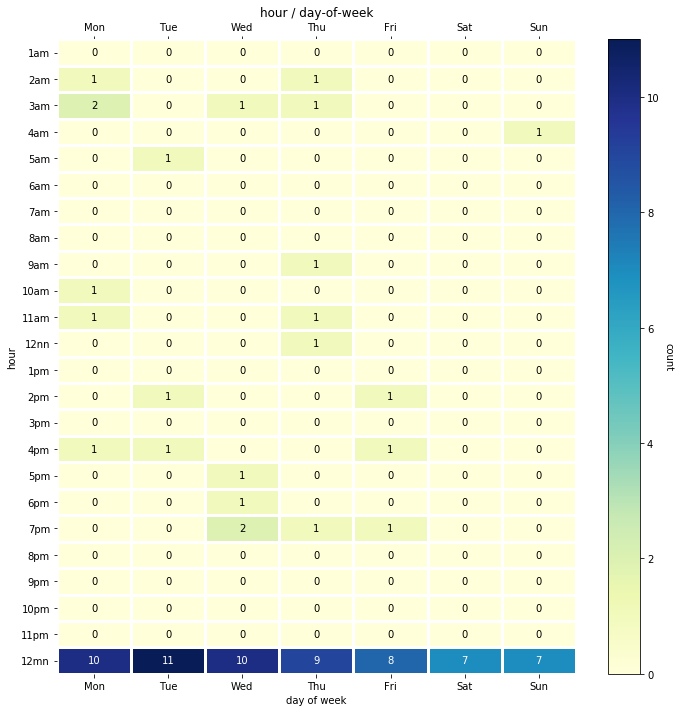

In [11]:
tss2.hour_of_day.plot()

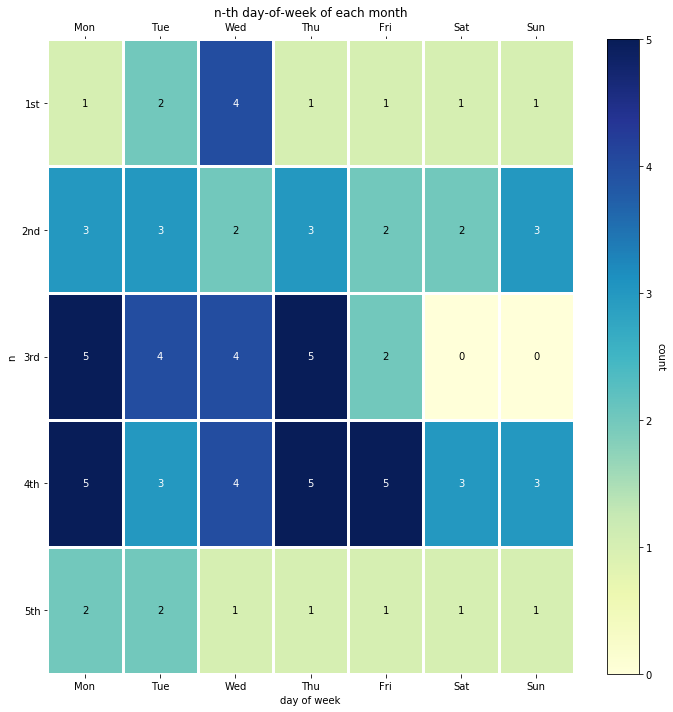

In [12]:
tss2.nth_day_of_month.plot()

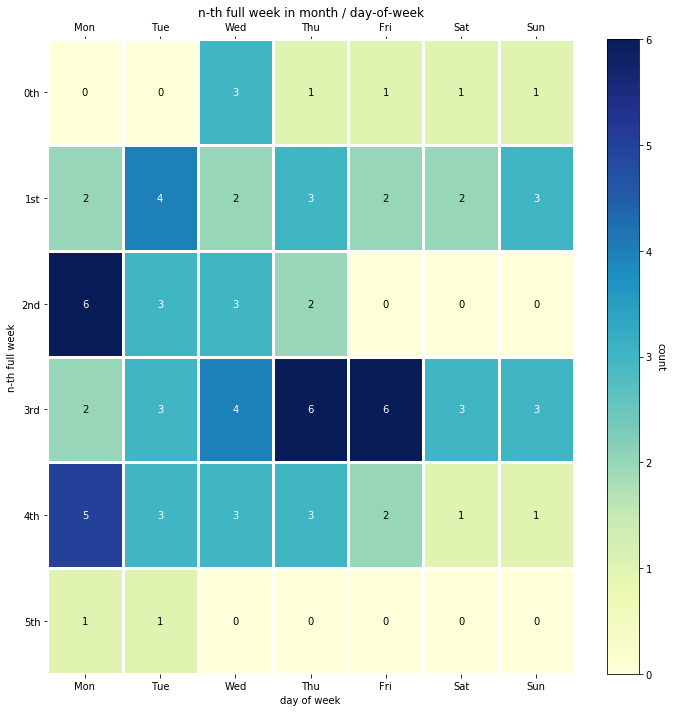

In [13]:
tss2.full_week_of_month.plot()

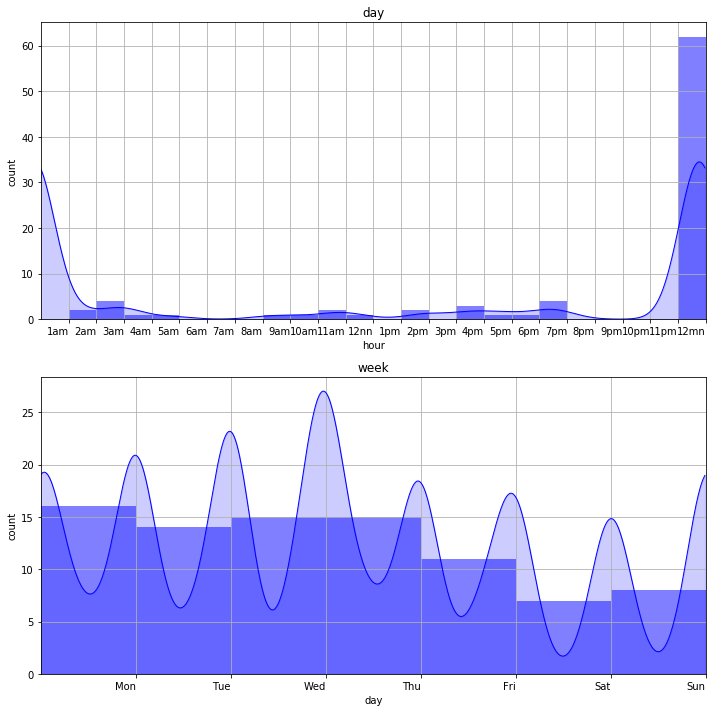

In [14]:
tss2.plot()

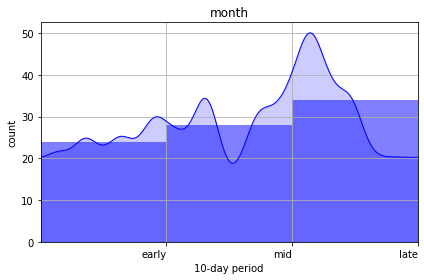

In [15]:
tss2.month.plot()

2020-06-18 02:55:11.757531+00:00 0.15403505732998918
2020-06-18 11:29:16.733984+00:00 0.20458545264020964
2020-06-18 11:30:58.763188+00:00 0.20458545264020964
2020-06-18 11:32:40.804424+00:00 0.2003356740020991
2020-06-18 11:34:22.842461+00:00 0.2003356740020991
2020-06-18 11:36:04.885593+00:00 0.2003356740020991
2020-06-18 11:37:46.934771+00:00 0.19639049694461652
2020-06-18 11:39:28.969945+00:00 0.19639049694461652
2020-06-18 11:41:11.008171+00:00 0.19639049694461652
2020-06-18 11:42:53.025527+00:00 0.1912582728936664
2020-06-18 11:44:35.065973+00:00 0.1912582728936664
2020-06-18 11:46:17.104564+00:00 0.1912582728936664
2020-06-18 11:47:59.139159+00:00 0.18660043007737256
2020-06-18 11:49:41.171116+00:00 0.18660043007737256
2020-06-18 11:51:23.195439+00:00 0.18660043007737256
2020-06-18 11:53:05.232281+00:00 0.18199502735764417
2020-06-18 11:54:47.266775+00:00 0.18199502735764417
2020-06-18 11:56:29.301337+00:00 0.18199502735764417
2020-06-18 11:57:46.934712+00:00 0.1752299751700073


2020-08-26 18:54:41.035887+00:00 0.2973505808950344
2020-08-26 18:55:57.794450+00:00 0.2973505808950344
2020-08-26 19:08:35.911797+00:00 0.30441408905214407
2020-08-26 19:09:09.948529+00:00 0.30441408905214407
2020-08-26 19:38:02.921797+00:00 0.2883587710333202
2020-08-26 19:39:14.955021+00:00 0.2883587710333202
2020-08-26 19:40:26.977568+00:00 0.2883587710333202
2020-08-26 19:41:38.993315+00:00 0.2883587710333202
2020-08-26 19:42:51.020248+00:00 0.2816334234687804
2020-08-26 19:44:03.074397+00:00 0.2816334234687804
2020-08-26 19:45:15.105664+00:00 0.2816334234687804
2020-08-26 19:46:27.128547+00:00 0.2816334234687804
2020-09-02 02:54:10.391828+00:00 0.12246257826454625
2020-09-02 16:42:20.034699+00:00 0.25352605090281033
2020-09-02 16:44:02.564662+00:00 0.25352605090281033
2020-09-10 08:12:02.885054+00:00 0.07904286992549807
2020-09-14 02:51:47.241110+00:00 0.11161960684406964
2020-09-14 09:15:37.574806+00:00 0.061604059394421616
2020-09-14 09:16:49.610157+00:00 0.061604059394421616
2

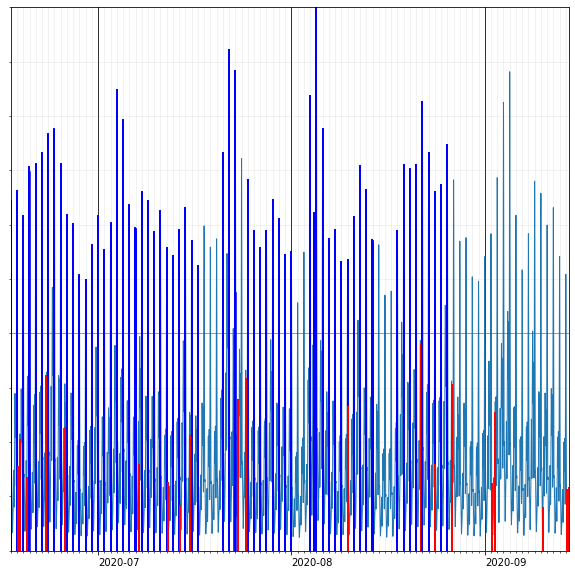

In [25]:
tss.plot_session_likelihoods()

2020-06-18 02:55:11.757531+00:00 0.32657849280801887
2020-06-18 11:29:16.733984+00:00 0.18356623716160242
2020-06-19 13:56:40.458317+00:00 0.18975457713145708
2020-06-22 15:55:35.641294+00:00 0.2633164668773907
2020-06-25 18:12:43.841658+00:00 0.26998486230919705
2020-07-07 13:45:16.870146+00:00 0.16826154109538977
2020-07-12 03:14:17.279309+00:00 0.24540619583210535
2020-07-14 04:41:53.296440+00:00 0.19491139754354875
2020-07-15 17:02:58.162901+00:00 0.24123147771186546
2020-07-22 18:35:12.979131+00:00 0.3493399012029927
2020-07-23 10:40:43.078489+00:00 0.24247925196735604
2020-07-24 15:32:51.758028+00:00 0.24511555016445954
2020-08-04 15:07:11.720696+00:00 0.19744936765072993
2020-08-10 01:13:25.736543+00:00 0.38652766903641894
2020-08-21 18:14:35.794150+00:00 0.2902668139320559
2020-08-24 02:04:54.170308+00:00 0.3422258317347645
2020-08-26 18:54:41.035887+00:00 0.2915176283086412
2020-09-02 02:54:10.391828+00:00 0.27525581094907847
2020-09-02 16:42:20.034699+00:00 0.2265634714649090

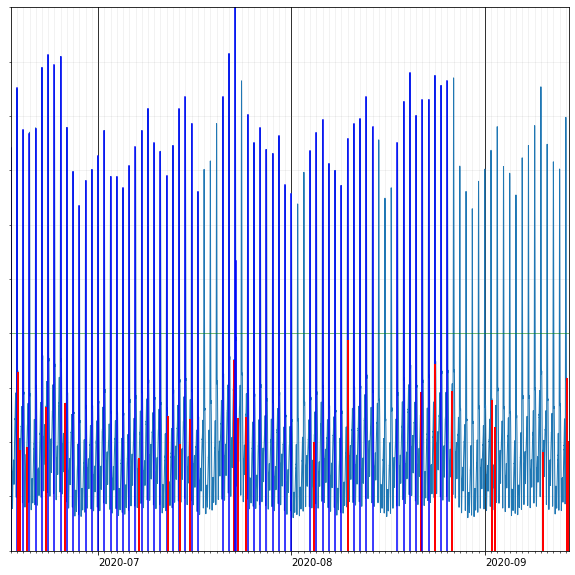

In [24]:
tss2.plot_session_likelihoods()

# periodicity

In [20]:
df = get_topk_periods(pd.Series(pd.to_datetime(tss2.timestamps)), k=1000)
df

flattening...
have 86 unique timestamps
not thresholding, only have 86 unique timestamps (less than 1000)
fft...
making dataframe...


,magnitude,period_seconds,period_days,period_timedelta,period_formatted,weight
1040,69.038470,1041.0,0.012049,00:17:21,17.35 minutes,4.234664
1415,68.726611,1416.0,0.016389,00:23:36,23.60 minutes,4.230136
238,68.133750,239.0,0.002766,00:03:59,3.98 minutes,4.221473
4308,67.981467,6172.0,0.071435,01:42:52,1.71 hours,4.219235
591,67.883550,592.0,0.006852,00:09:52,9.87 minutes,4.217794
...,...,...,...,...,...,...
1925,11.903189,1926.0,0.022292,00:32:06,32.10 minutes,2.476806
720,11.899360,721.0,0.008345,00:12:01,12.02 minutes,2.476485
1704,11.898217,1705.0,0.019734,00:28:25,28.42 minutes,2.476389
4953,11.896762,12719.0,0.147211,03:31:59,3.53 hours,2.476266


note: too many harmonics to be useful

In [33]:
df[(df['period_seconds'] > 3600) & (df['magnitude'] > 30)].sort_values('period_seconds', ascending=False).head(10)

,magnitude,period_seconds,period_days,period_timedelta,period_formatted,weight
5472,47.847005,86890.0,1.005671,1 days 00:08:10,1.01 days,3.868009
5471,45.047394,85925.0,0.994502,0 days 23:52:05,0.99 days,3.807715
5382,59.861165,43203.0,0.500035,0 days 12:00:03,12.00 hours,4.092028
5293,51.059811,28855.0,0.333970,0 days 08:00:55,8.02 hours,3.932998
5292,40.687009,28748.0,0.332731,0 days 07:59:08,7.99 hours,3.705909
5203,58.780125,21601.0,0.250012,0 days 06:00:01,6.00 hours,4.073804
5114,45.478526,17300.0,0.200231,0 days 04:48:20,4.81 hours,3.817240
5113,49.006704,17262.0,0.199792,0 days 04:47:42,4.79 hours,3.891957
5024,60.390594,14401.0,0.166678,0 days 04:00:01,4.00 hours,4.100833
4935,38.252441,12353.0,0.142975,0 days 03:25:53,3.43 hours,3.644207
